 # NX31 - Dataproject

# Introduction

This dataproject examines the employment changes, by looking at the workforce distribution in Denmark, from Q1 2009 and until Q4 2018. It contains a data analysis of the employment, in both the private and public sector over this period. It tries to explain the fluctuations, using known events and changes to policies, over this period. We will also include both stationary and interactive plots to better visualize the changes to the employment over this periode.

During this project, we will be doing the following:
* Establish an API connection to Statistics Denmark, to feed the analysis data
* Clean and structure this data
* Plot this data
* Make an analysis and compare results
* Conclusion

## Packages and extentions 

We will load the following packages and attributes for this data project.

In [1]:
# These two lines above makes sure that the functions and packages are automatically reloaded each time we run a cell.
%load_ext autoreload
%autoreload 2

In [2]:
# Imports the packages that are needed to run the project in full.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydst
import matplotlib.ticker as mtick
import ipywidgets as widgets

# Data

We have choosen to use the PyDST package that can load data from Statistics Denmark, using an API call. As we want to look into the workforce distribution, we start by finding the data we want. We do this using our browser on Statistic Denmark. From our research we will need to load the table "LBESK21" as this table includes data on how many is employed in the public and private sector. We put in the table id we just found, and start off by looking into, what variables that are present in the table.  

We use the information about the variables, when we load in the data, to sort out data that we don't need. The PyDST packages then makes sure, we only get the data that we are interested in, feeding it what variables we want to look at.

In [3]:
# Creates a variable that sets the pydst package to load data variables in english
dst = pydst.Dst(lang='en') 

FTE_variables = dst.get_variables(table_id = 'LBESK21')
FTE_variables

,elimination,id,text,time,values
0,False,TAL,unit,False,"[{'id': '1020', 'text': 'Employees'}, {'id': '..."
1,True,SEKTOR,sector,False,"[{'id': '1000', 'text': 'All sectors'}, {'id':..."
2,False,Tid,time,True,"[{'id': '2008K1', 'text': '2008Q1'}, {'id': '2..."


In [4]:
# Shows what variables that is contained in the table
FTE_variables['values'][0][:]

[{'id': '1020', 'text': 'Employees'},
 {'id': '1010', 'text': 'Full-time employees'}]

In [5]:
# Shows what variables that is contained in the table
FTE_variables['values'][1][:]

[{'id': '1000', 'text': 'All sectors'},
 {'id': '1015', 'text': 'Central government'},
 {'id': '1020', 'text': 'Regional government'},
 {'id': '1025', 'text': 'Municipal government'},
 {'id': '1030', 'text': 'Social security funds'},
 {'id': '1035', 'text': 'Public corporations'},
 {'id': '1040', 'text': 'Private corporations'},
 {'id': '1045', 'text': 'Private nonprofit organizations'},
 {'id': '1050', 'text': 'Sector not stated'}]

We see that the data for employment in Denmark has 9 different variables, where one of them contains a total of the other 8. And we are only interested in the Full-time employees.

### Creating Dictionaires

We create the following dictionaries to better structure the data and to create shorter or more precise variable names. </br>
We again use the variable names which we found above to make these dictionaires.

In [6]:
# Creates empty dictionairies, which we fill with keys and a  corresponding values.
columns_dict = {}
columns_dict['TAL'] = 'Type'
columns_dict['SEKTOR'] = 'Sector'
columns_dict['TID'] = 'Quarter'
columns_dict['INDHOLD'] = 'FTE'

var_dict = {} 
var_dict['All sectors'] = 'Total'
var_dict['Central government'] = 'Central'
var_dict['Regional government'] = 'Regional'
var_dict['Municipal government'] = 'Municipal'
var_dict['Social security funds'] = 'Social'
var_dict['Public corporations'] = 'Public corp'
var_dict['Private corporations'] = 'Private corp'
var_dict['Private nonprofit organizations'] = 'Private NPO'
var_dict['Sector not stated'] = 'SNS'

### Importing Data

We now import data from Statistic Denmark using the PyDST. We use the variables we found above, so we only get the data from the full-time employess. In this case we need all Sector data from the table as well as all periods.

In [7]:
# Creates a variable that contains the data from the table, which we give as input.
FTE_raw = dst.get_data(table_id = 'LBESK21', variables = {'SEKTOR':['*'], 'TAL':['1010'], 'Tid':['*']})

FTE_raw.head(10)

,SEKTOR,TAL,TID,INDHOLD
0,All sectors,Full-time employees,2008Q1,2245921
1,Central government,Full-time employees,2008Q1,164276
2,Regional government,Full-time employees,2008Q1,111410
3,Municipal government,Full-time employees,2008Q1,431690
4,Social security funds,Full-time employees,2008Q1,1921
5,Public corporations,Full-time employees,2008Q1,66524
6,Private corporations,Full-time employees,2008Q1,1419034
7,Private nonprofit organizations,Full-time employees,2008Q1,50890
8,Sector not stated,Full-time employees,2008Q1,176
9,All sectors,Full-time employees,2008Q2,2293127


### Renaming variables
We use the dictionaries to rename the variable names.

In [8]:
# Renames the columns using the dictionaries that we creates
FTE_raw.rename(columns = columns_dict, inplace = True) 

for key, value in var_dict.items():
    FTE_raw.Sector.replace(key, value, inplace = True)
    
FTE_raw.head(10)

,Sector,Type,Quarter,FTE
0,Total,Full-time employees,2008Q1,2245921
1,Central,Full-time employees,2008Q1,164276
2,Regional,Full-time employees,2008Q1,111410
3,Municipal,Full-time employees,2008Q1,431690
4,Social,Full-time employees,2008Q1,1921
5,Public corp,Full-time employees,2008Q1,66524
6,Private corp,Full-time employees,2008Q1,1419034
7,Private NPO,Full-time employees,2008Q1,50890
8,SNS,Full-time employees,2008Q1,176
9,Total,Full-time employees,2008Q2,2293127


# Analysis

### Table
We create this table to give a better view of the data, with the quaters as index and the sectors on the columns section. This way allows us to better follow a changes for a given section from quarter to quarter.

In [9]:
# Creates a copy of our data and pivot the data using the 'Quarter' as the index.
FTE_table = FTE_raw.copy().pivot(index = 'Quarter', columns = 'Sector', values = 'FTE')


FTE_table.head(10)

Sector,Central,Municipal,Private NPO,Private corp,Public corp,Regional,SNS,Social,Total
Quarter,,,,,,,,,
2008Q1,164276,431690,50890,1419034,66524,111410,176,1921,2245921
2008Q2,167654,438649,51798,1457705,67932,107305,171,1913,2293127
2008Q3,166319,433840,50579,1434737,67966,111262,155,1849,2266707
2008Q4,170749,441479,53235,1436549,66651,114385,146,1843,2285036
2009Q1,169315,442231,52361,1370906,63247,114244,160,1843,2214306
2009Q2,172790,449778,52847,1345956,63739,116310,158,1873,2203450
2009Q3,170775,445803,52026,1319382,63619,115956,185,1889,2169636
2009Q4,173914,450609,54189,1308777,62527,118369,174,1896,2170454
2010Q1,172563,450873,53405,1256157,61600,117452,154,1860,2114063


### Descirbetive statistics

In [10]:
# Gives a table of decribtive statistics for analysis.
FTE_raw.groupby(['Sector']).describe()

FTE                                                     \
             count          mean           std        min         25%   
Sector                                                                  
Central       44.0  1.732000e+05   2665.832350   164276.0   172505.00   
Municipal     44.0  4.306531e+05  12017.772657   413069.0   420759.25   
Private NPO   44.0  5.564655e+04   2920.092938    50579.0    53397.25   
Private corp  44.0  1.345794e+06  62470.694702  1256157.0  1295036.75   
Public corp   44.0  5.720139e+04   5156.476606    49765.0    52700.75   
Regional      44.0  1.183478e+05   3491.849366   107305.0   116019.00   
SNS           44.0  2.182500e+02     65.803487      131.0      157.75   
Social        44.0  1.940386e+03     96.370462     1843.0     1876.00   
Total         44.0  2.183001e+06  58137.497454  2090889.0  2139007.75   

                                                
                    50%         75%        max  
Sector                                          
Central        173527.5   174949.50   177641.0  
Municipal      428491.5   439356.50   457033.0  
Private NPO     54823.0    57721.25    61666.0  
Private corp  1326636.0  1406219.25  1474089.0  
Public corp     56447.0    60960.25    67966.0  
Regional       119047.0   121126.25   122494.0  
SNS               196.5      280.75      327.0  
Social           1902.0     1987.75     2147.0  
Total         2166748.0  2228244.75  2307874.0

We create a table with descriptive statistics. From this we can make some simple conclusions. 
We see that Private Corp has a higher volatility than the total work force. If we look at the figure below we see that the private workforce is much more volatile than the public. The table above doesn't tell us everything, but it gives us a hint of the changes.
These findings correspond well with general perceptions of how the private and public workforce move. The public workforce is very stationary and grows slowly each year. The private workforce is much more volitile and moves with the market, and decreases/increases with the economic growth.

## Visualization

### Plot of sectors in the workforce.

We have 8 sectors in the workforce and a total for the entire workforce. Below we plot these.

Text(0.5, 1.0, 'Full workforce - Split in sectors')

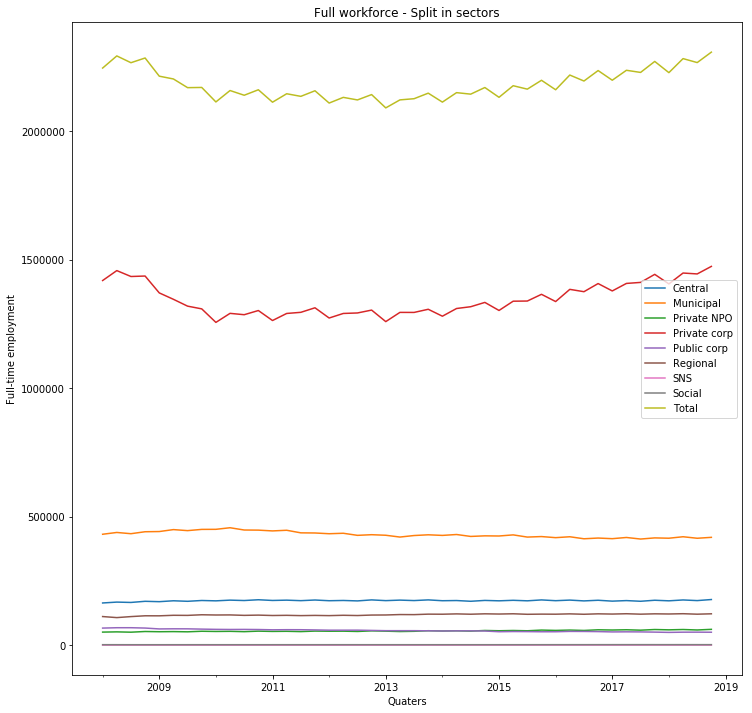

In [11]:
#Creates a figure with only one subplot
fig1, ax = plt.subplots(figsize=(12,12)) 
FTE_raw['Quarter'] = pd.to_datetime(FTE_raw['Quarter']) # Changes variable Quaters to a time format that pandas recognizes

FTE_raw.set_index('Quarter').groupby('Sector')['FTE'].plot(x="Quarter", legend=True, ax=ax);

ax.set_ylabel("Full-time employment") # Sets title for y-axis
ax.set_xlabel('Quaters') # Sets title for x-axis
ax.set_title("Full workforce - Split in sectors") # Sets title for the figure

We see that there is large differences in the plots and thus we don't really see the changes in the smaller sectors. Instead we will look at the relative changes.

### Relative changes and merging

We will now calculate all the changes as relative changes.
We create a dataframe for each sector, which include the relative changes for that sector.

In [12]:
# Calculating the relative changes for the sectors
rc_central = pd.DataFrame(data=FTE['Central']/FTE['Total']*100)
rc_municipal = pd.DataFrame(FTE['Municipal']/FTE['Total']*100)
rc_privnpo = pd.DataFrame(FTE['Private NPO']/FTE['Total']*100)
rc_privcorp = pd.DataFrame(FTE['Private corp']/FTE['Total']*100)
rc_pubcorp = pd.DataFrame(FTE['Public corp']/FTE['Total']*100)
rc_regional = pd.DataFrame(FTE['Regional']/FTE['Total']*100)
rc_sns = pd.DataFrame(FTE['SNS']/FTE['Total']*100)
rc_social = pd.DataFrame(FTE['Social']/FTE['Total']*100)

NameError: name 'FTE' is not defined

In order to plot the relative development later, we need to merge the four dataframes into one. We do this in the following code.

In [ ]:
# Merging the dataframes for relative changes on quarters
rFTE_6 = pd.merge(rc_central, rc_municipal, on='Quarter') 
rFTE_5 = pd.merge(rFTE_6, rc_privnpo, on='Quarter')
rFTE_4 = pd.merge(rFTE_5, rc_privcorp, on='Quarter')
rFTE_3 = pd.merge(rFTE_4, rc_pubcorp, on='Quarter')
rFTE_2 = pd.merge(rFTE_3, rc_regional, on='Quarter')
rFTE_1 = pd.merge(rFTE_2, rc_sns, on='Quarter')
rFTE = pd.merge(rFTE_1, rc_social, on='Quarter')

rFTE.head(10)

### Renaming


We rename the columns for our new dataframe with relative development to reflect the correct columns.

In [ ]:
rFTE.columns = ['Central', 'Municipal', 'Private NPO', 'Private corp', 'Public corp', 'Regional', 'SNS', 'Social']
rFTE.head(10)

In [ ]:
#Creates a figure
fig2, ax = plt.subplots(figsize=(12,12))

rFTE.reset_index(drop=True)
FTE_raw.set_index('Quarter')
rFTE.index = pd.DatetimeIndex(data=rFTE.index)

fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

ax.set_xlabel("Quarters")
ax.set_ylabel("Percent")
ax.set_title("Relative share of total public employment")

rFTE.plot(legend=True, ax=ax);

Unfortunately it is still difficult to see the changes due to the scaling. We will move on and do an interactive plot.

### Interactive Figure for relative development

The interactive plot will include a dropdown, where one can choose which sector you want to look at.


In [ ]:
def plot_e(dataframe, Central): ax = dataframe.loc[:,[Central]].plot(figsize=(12,12))

mylist = rFTE.columns.unique().tolist()
widgets.interact(plot_e, dataframe = widgets.fixed(rFTE), Central = widgets.Dropdown(description='Sector', options=mylist) );

These relative figures shows us different changes. Looking at the municipals, we see a general decrease in employees, we haven't been able to find other reasons, than the government made some economic changes and lowers the subsidy that municipals get from the state. Private Corp has a high drop of approximate 4% in the beginning of the financial crises. This is due to the firms having a hard economic time and thus had to close or layoff people. 

## Public vs. Private

Now that we have looked into the individual components of the workforce, we create a new dataframe, including the total amount of Full-time employees from the private and the public sector and look at the developments in the workforce from a private and public perspective. We again look at the entire periode from 2008 Q1 up till 2018 Q4. 

In [ ]:
## 
#FTE2 = FTE_raw[(FTE_raw['Sector'] == 'Total')]
#FTEG2 = FTE_raw[(FTE_raw['Sector'] == 'Central') + (FTE_raw['Sector'] == 'Regional') + (FTE_raw['Sector'] == 'Municipal') + (FTE_raw['Sector'] == 'Social')]
#FTEP2 = FTE_raw[(FTE_raw['Sector'] == 'Private corp') & (FTE_raw['Sector'] == 'Public corp') & (FTE_raw['Sector'] == 'Private NPO')]
## The above lines, create 3 dataframes by selecting only the data we need, FTEs and split it in 3, Public, Private and Total workforce.
#
#print(FTE2.head(10))
#print(FTEG2.head(10))
#print(FTEP2.head(10))

In [ ]:
FTE_raw_copy = FTE_raw.pivot_table(index=["Quarter", "Type"], columns="Sector", values="FTE").reset_index()
FTE = FTE_raw_copy[["Quarter", "Total"]].copy()
FTE["Government"] = FTE_raw_copy["Central"] + FTE_raw_copy["Municipal"] + FTE_raw_copy["Public corp"] + FTE_raw_copy["Regional"] + FTE_raw_copy["Social"]
FTE["Private"] = FTE_raw_copy["Private NPO"] + FTE_raw_copy["Private corp"] + FTE_raw_copy["SNS"]

FTE.pivot_table(index="Quarter", values=["Total", "Government", "Private"])

Now we merge the three dataframes to get our desired dataframe.

In [ ]:
#FTE1 = pd.merge(FTE_total, FTEG_total, on='Quarter') # merging total and public employment
#FTE = pd.merge(FTE1, FTEP_total, on='Quarter') # merging private employment with total and public employment

#FTE_log = np.log(FTE)
#FTE_log.index = pd.DatetimeIndex(data=FTE_log.index) # sets the index to a time index, which is still Quarter but in another format
plt.plot(FTE)
#FTE.plot(figsize=(12,12), title='Full-time employment') # plots our final figure


In [ ]:
fig3, ax = plt.subplots(figsize=(12,12))

FTE.index = pd.DatetimeIndex(data=FTE.index)

ax.set_xlabel("Quarters")
ax.set_ylabel("Full-time emplo")
ax.set_title("Relative share of total public employment")

FTE.plot(legend=True, ax=ax);

Looking on the figure above, we see that the total employment in general follow the private employment (FTEP). Though we see a rise in public employment after the financial crises, this rise is temporary and flattens out. This rise in public employment comes from the increased and expidited investment, that the government approved after the finansial crises hit. This was to lessen the blow to the economy. From an employment perspective, we see that the public employment kept on rising until the private sector had met the current needs, and thus we can conclude that the Government did in fact lessen the blow some. After the private sector started growing again, the public sector started shrinking. 

We also see that the private sector has to some degree a portion of season workers.

# Conclusion

In 2008 we were hit by one of the longest lasting financial crisis in modern times.
In 2010 we see the lowest private employment in the period, but also the largest public sector in history. 
The private employment is close to 1.3 million employees, almost 300.000 lower than the peak before the crises of 1.6 million. 
On the other hand the government increased the workforce by almost 50.000 from 810k to 860k employees in just 2 years. This was done to lessen the economic impact of the crises. 
From 2010 the private employment slowly grows and the public employment slowly returns to its normal level. From 2010 and up, the private employment has been slowly growing, likely because of the loose economic politics in this periode.

